In [46]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../input_data/gg_regression_table_for_descriptives.csv')

In [20]:
len(df.advertiser_id.unique())

550

In [11]:
len(df.dropna(subset='estcost').advertiser_id.unique()) # Number of sponsors who invested in TV ads

368

In [21]:
df.AverageSimilarity.mean()

0.6460659856825343

In [5]:
df_cand = df[(df.candidate == 1)]

## DV descriptives

In [6]:
source_path = '/home/mzhang01/google_2022/produce_complete_data/05-assemble-final-results'

In [7]:
var = pd.read_csv(os.path.join(source_path, 'g2022_adid_var_sets_072024.csv.gz'))

In [8]:
var = var.loc[var.set3 == 1]

**General election period**

In [9]:
condition = (var.date_range_end >= '2022-09-01') & (var.date_range_start <= '2022-11-30')
'''
Second condition is not necessary: resulting dataframe shapes are the same.
'''
var = var[condition]

In [10]:
text = pd.read_csv(os.path.join(source_path, 'g2022_adid_01062021_11082022_text_v20240115.csv.gz'))

/tmp/ipykernel_13362/2166353682.py:1: DtypeWarning: Columns (3,5,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  text = pd.read_csv(os.path.join(source_path, 'g2022_adid_01062021_11082022_text_v20240115.csv.gz'))


In [11]:
var = var.merge(text, how='left', on='ad_id').drop_duplicates()

In [12]:
cid_table_path = '../../../google_2022/produce_complete_data/04-dedup-2nd-time/final_output/cid_google2022_v20231203.csv'
cid = pd.read_csv(cid_table_path)

In [13]:
var = var.merge(cid, how='left', on='ad_id').drop_duplicates()

In [14]:
del text, cid

In [20]:
var.columns

Index(['ad_id', 'advertiser_id', 'date_range_start', 'date_range_end',
       'num_of_days', 'impressions', 'age_targeting', 'gender_targeting',
       'geo_targeting_included', 'geo_targeting_excluded',
       'spend_range_min_usd', 'spend_range_max_usd', 'aws_face_vid',
       'aws_face_img', 'sub_bucket', 'race_of_focus', 'ad_tone_constructed',
       'ad_tone_mentionbased', 'party_all_clf', 'prob_dem', 'prob_other',
       'prob_rep', 'party_all_clf_adid', 'party_all_clf_adid_agg', 'party_all',
       'detected_entities', 'field', 'detected_entities_federal',
       'attacklike1_bert_pred', 'attacklike1_bert_prob',
       'attacklike2_bert_pred', 'attacklike2_bert_prob',
       'attacklike3_bert_pred', 'attacklike_senti_pred',
       'attacklike_senti_prob', 'ABSA_field', 'ABSA_predicted_sentiment',
       'issue_field', 'issue_class', 'aws_face', 'aws_face_federal',
       'combined_entities_federal', 'federal_verified',
       'goal_DONATE_prediction', 'goal_DONATE_predicted_prob

**Number of unique creatives: General election period**

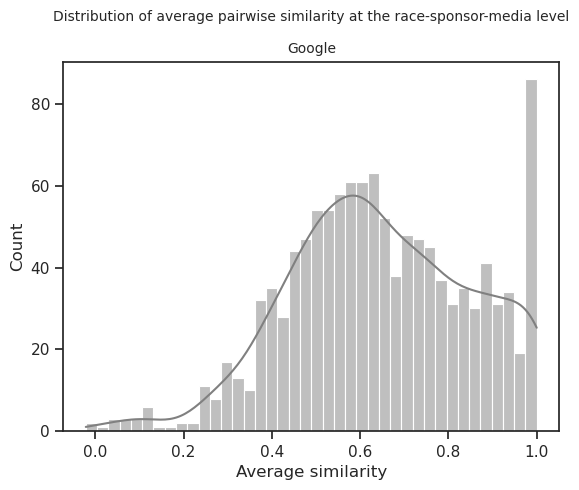

In [22]:
sns.set_theme(style='ticks', palette="tab10")

g = sns.histplot(df.AverageSimilarity, kde=True, bins=40, color='gray', line_kws={'color': 'gray'})

g.set(title='Distribution of average pairwise similarity at the race-sponsor-media level\n\nGoogle', xlabel='Average similarity')
g.title.set_size(10)

In [16]:
df_agg = df.merge(var[['advertiser_id', 'advertiser_name']], how='left', on='advertiser_id').drop_duplicates()

In [25]:
df_agg['advertiser_name'] = df_agg['advertiser_name'].str.lower()

In [26]:
df_agg = df_agg.groupby(['advertiser_id']).agg({'advertiser_name': 'first', 'num_unique': 'sum'}).reset_index() 

In [27]:
df_agg.num_unique.mean()

14.55090909090909

In [28]:
df_agg.num_unique.median()

6.0

In [30]:
df_agg[df_agg.advertiser_name == 'nrsc'] 

,advertiser_id,advertiser_name,num_unique
277,AR08880960613904285697,nrsc,12


In [29]:
df_agg.sort_values(by='num_unique', ascending=False).head(40)

,advertiser_id,advertiser_name,num_unique
228,AR07103154765395132417,congressional leadership fund,720
37,AR01156151457452392449,dccc,205
436,AR15056374268377956353,house majority pac,204
368,AR12051724274625413121,mary peltola for alaska,190
344,AR11384730834402541569,bennet for colorado,168
450,AR15510028093073915905,americans for prosperity action inc,156
124,AR03962319536304160769,mark kelly for senate,129
390,AR12988012301746438145,senate leadership fund,127
501,AR17145618984477917185,priorities usa action & smp,110
232,AR07182956219827486721,warnock for georgia,107


(0.0, 100.0)

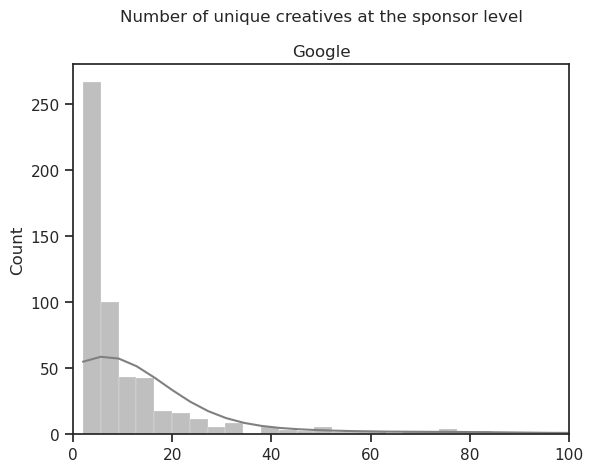

In [23]:
# aggregated num_unique histogram (sponsor level)
g = sns.histplot(df_agg.num_unique, kde=True, bins=200, color='gray')
g.set(title='Number of unique creatives at the sponsor level\n\nGoogle', xlabel='')
plt.xlim((0, 100))

### Sophistication index

In [31]:
def create_sophistication_index(input_df):
    max_ = input_df.num_unique.max()
    min_ = input_df.num_unique.min()
    input_df['num_unique_normalized'] = (input_df.num_unique - min_)/(max_ - min_)
    input_df['sophistication_index'] = input_df['num_unique_normalized'] * (1 - input_df.AverageSimilarity)
    return input_df

In [32]:
df_cand = create_sophistication_index(df_cand)

/tmp/ipykernel_13362/1499460830.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['num_unique_normalized'] = (input_df.num_unique - min_)/(max_ - min_)
/tmp/ipykernel_13362/1499460830.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['sophistication_index'] = input_df['num_unique_normalized'] * (1 - input_df.AverageSimilarity)


In [33]:
cols = ['advertiser_id', 'advertiser_name', ]
df_cand = df_cand.merge(var[cols], how='left', on='advertiser_id').drop_duplicates()

In [25]:
df_cand.columns

Index(['advertiser_id', 'ad_type', 'cids', 'AverageSimilarity', 'std',
       'num_unique', 'estcost', 'race_competitiveness', 'goal_DONATE_pct',
       'goal_GOTV_pct', 'goal_PRIMARY_PERSUADE_pct', 'wmp_sen', 'wmp_hse',
       'image', 'video', 'party', 'group', 'Democratic', 'third_party',
       'senate', 'house', 'candidate', 'num_unique_normalized',
       'sophistication_index', 'advertiser_name'],
      dtype='object')

#### General eleciton period

**To display for in draft**

In [36]:
from IPython.display import display, HTML

In [37]:
df_cand["advertiser_name"] = df_cand.advertiser_name.str.title()

In [45]:
df_cand["ad_type"] = df_cand.ad_type.str.title()

**general election period**

In [44]:
cols2display = ['advertiser_name', 'sophistication_index', 'ad_type', 'num_unique', 'AverageSimilarity']

display_df = df_cand[cols2display].drop_duplicates().sort_values(by='sophistication_index', ascending=False).head(22)

display(HTML(display_df.to_html(index=False)))

advertiser_name,sophistication_index,ad_type,num_unique,AverageSimilarity
Warnock For Georgia,0.419235,Video,98,0.397350
Mary Peltola For Alaska,0.387383,Image,140,0.612617
Mark Kelly For Senate,0.357489,Video,94,0.463766
Kevin Porter For Congress,0.291055,Video,65,0.362450
Maggie For Nh,0.206943,Video,57,0.480761
Bennet For Colorado,0.205949,Video,55,0.463755
Catherine Cortez Masto For Senate,0.198826,Video,54,0.472347
Marco Rubio For Senate,0.167061,Text,41,0.408861
Mary Peltola For Alaska,0.156341,Video,50,0.550519
Mark Kelly For Senate,0.151989,Text,35,0.364411


In [43]:
df_cand[cols2display].sort_values(by='sophistication_index', ascending=False).head(50)

,advertiser_name,sophistication_index,ad_type,num_unique,AverageSimilarity
13601,Warnock For Georgia,0.419235,Video,98,0.397350
19957,Mary Peltola For Alaska,0.387383,Image,140,0.612617
8222,Mark Kelly For Senate,0.357489,Video,94,0.463766
25285,Kevin Porter For Congress,0.291055,Video,65,0.362450
14518,Maggie For Nh,0.206943,Video,57,0.480761
19109,Bennet For Colorado,0.205949,Video,55,0.463755
18810,Bennet For Colorado,0.205949,Video,55,0.463755
2490,Catherine Cortez Masto For Senate,0.198826,Video,54,0.472347
27458,Marco Rubio For Senate,0.167061,Text,41,0.408861
20663,Mary Peltola For Alaska,0.156341,Video,50,0.550519


**Case studies**

In [44]:
warnock = var[var.advertiser_id == 'AR07182956219827486721'].groupby('wmp_creative_id')[text_cols].first()
warnock.to_csv('warnock_google.csv', index=False)

In [45]:
aoc = var[var.advertiser_id == 'AR17095295161908330497'].groupby('wmp_creative_id')[text_cols].first()
aoc.to_csv('aoc_google.csv', index=False)

In [46]:
bennet = var[var.advertiser_id == 'AR11384730834402541569'].groupby('wmp_creative_id')[text_cols].first()
bennet.to_csv('bennet_google.csv', index=False)